In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scf.scf_util import remove_empty_from_array

In [15]:
# パラメータ取得 -> sf自動作成
# n2p2のインプット用出力

from descriptors.sf.sfparamgen import SymFuncParamGenerator

myGenerator = SymFuncParamGenerator(elements=['Si'], r_cutoff=6)
myGenerator.symfunc_type = 'radial'
myGenerator.generate_radial_params(rule='imbalzano2018', mode='shift', nb_param_pairs=6)

In [16]:
# myGenerator.write_settings_overview()
import os

pwd = os.getcwd()
path2tmp = os.path.join(pwd, 'tmp.txt')
with open(path2tmp, mode='w') as f:
    myGenerator.write_parameter_strings(fileobj=f)

with open(path2tmp, mode='r') as f:
    l_strip = [s.strip() for s in f.readlines()]
    l_strip = remove_empty_from_array(l_strip)

os.remove(path2tmp)

In [17]:
l_strip = [remove_empty_from_array(i.split(' ')) for i in l_strip]

In [18]:
columns = ['sftype', 'elm1', 'sfnum', 'elm2', 'eta', 'rs', 'rcut']
df = pd.DataFrame(data=l_strip, columns=columns)
df[['eta', 'rs', 'rcut']] = df[['eta', 'rs', 'rcut']].astype(float)

In [38]:
# プロット
from descriptors.sf.sf_function import SymmetryFunction

fontsize=14
def plot_sf_radial(param, rmax, ax):
    sf = SymmetryFunction()
    r_ij = np.linspace(0, rmax, 100)
    ax.set_xlabel(f'interatomic distance(Å)', fontsize=fontsize)
    ax.set_ylabel('$e^{-\eta}(R_{ij}-R_s)^2f_c(R_{ij})$', fontsize=fontsize)
    sf_value = [sf.radial_symmetry_function_2(eta=param['eta'], r_ij=k, r_shift=param['rs'], r_cutoff=param['rcut']) for k in r_ij]
    ax.plot(r_ij, sf_value, label=f'η: {param["eta"]}, Rs: {param["rs"]}')
    ax.legend()

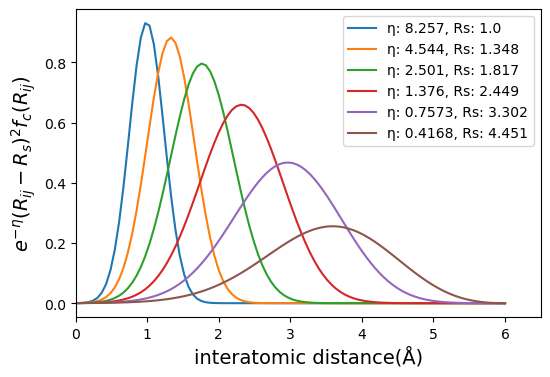

In [40]:
params = df[['eta', 'rs', 'rcut']].to_dict(orient='records')

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.set_xlim(0, 6.5)
for param in params:
    plot_sf_radial(param, 6, ax=ax)


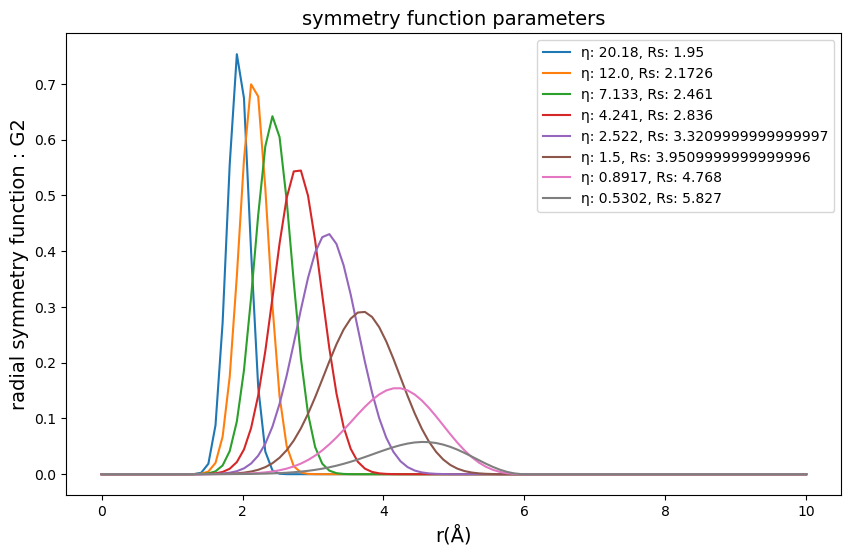

In [8]:
from descriptors.sf.get_sf_param import get_sf_radial_params
from descriptors.sf.plot_sf_param import plot_sf_radial

param_df = get_sf_radial_params(elm=['Si'], rcut=6, nb_param_pairs=8)
param_df['rs'] += 1.2
params = param_df[['eta', 'rs', 'rcut']].to_dict(orient='records')

fig = plt.figure(figsize=(10,6))
fig.set_facecolor('white')
ax = fig.add_subplot(111)
for param in params:
    plot_sf_radial(param=param, rmax=10, ax=ax, fontsize=14)
ax.legend()

In [9]:
param_df

,sftype,elm1,sfnum,elm2,eta,rs,rcut
0,symfunction_short,Si,2,Si,20.1800,1.9500,6.0
1,symfunction_short,Si,2,Si,12.0000,2.1726,6.0
2,symfunction_short,Si,2,Si,7.1330,2.4610,6.0
3,symfunction_short,Si,2,Si,4.2410,2.8360,6.0
4,symfunction_short,Si,2,Si,2.5220,3.3210,6.0
5,symfunction_short,Si,2,Si,1.5000,3.9510,6.0
6,symfunction_short,Si,2,Si,0.8917,4.7680,6.0
7,symfunction_short,Si,2,Si,0.5302,5.8270,6.0


In [10]:
from descriptors.sf.sf_function import SymmetryFunction
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


def plot_sf_ang(param: dict, rmax: float, ax, fontsize=12) -> None:
    """
    plot radial sf from param({eta: , rs: , rcut: })
    """
    sf = SymmetryFunction()
    r_ij = np.linspace(0, rmax, 100)
    ax.set_title(f'symmetry function parameters', fontsize=fontsize)
    ax.set_xlabel(f'r(Å)', fontsize=fontsize)
    ax.set_ylabel(f'radial symmetry function : G2', fontsize=fontsize)
    sf_value = [sf.ang_symmetry_function_3(theta=param[0], lambdas=param[1], zeta=param[2]) for k in r_ij]
    ax.plot(r_ij, sf_value, label=f'η: {param["eta"]}, Rs: {param["rs"]}')


In [11]:
from descriptors.sf.get_sf_param import get_sf_radial_params, get_sf_ang_params
from descriptors.sf.get_sf_param import  get_sf_params_str
from descriptors.sf.plot_sf_param import plot_sf_radial

# param_df = get_sf_radial_params(elm=['Si'], rcut=6, nb_param_pairs=6)
rcut = 6
ang_param_df = get_sf_ang_params(
    elm=['Si'],
    rcut=rcut,
    nb_param_pairs=5,
    ang_type='angular_wide',
    zetas=[1, 6],
    r_lower=3
)
# params = param_df[['eta', 'rs', 'rcut']].to_dict(orient='records')

# fig = plt.figure(figsize=(10,6))
# fig.set_facecolor('white')
# ax = fig.add_subplot(111)
# for param in params:
#     plot_sf_radial(param=param, rmax=10, ax=ax, fontsize=14)
# ax.legend()

In [12]:
for i in get_sf_params_str(ang_param_df):
    print(i)

symfunction_short Si 9 Si Si 0.05556 -1.0 1.0 6.0 0.0
symfunction_short Si 9 Si Si 0.05556 1.0 1.0 6.0 0.0
symfunction_short Si 9 Si Si 0.05556 -1.0 6.0 6.0 0.0
symfunction_short Si 9 Si Si 0.05556 1.0 6.0 6.0 0.0
symfunction_short Si 9 Si Si 0.03556 -1.0 1.0 6.0 0.0
symfunction_short Si 9 Si Si 0.03556 1.0 1.0 6.0 0.0
symfunction_short Si 9 Si Si 0.03556 -1.0 6.0 6.0 0.0
symfunction_short Si 9 Si Si 0.03556 1.0 6.0 6.0 0.0
symfunction_short Si 9 Si Si 0.02469 -1.0 1.0 6.0 0.0
symfunction_short Si 9 Si Si 0.02469 1.0 1.0 6.0 0.0
symfunction_short Si 9 Si Si 0.02469 -1.0 6.0 6.0 0.0
symfunction_short Si 9 Si Si 0.02469 1.0 6.0 6.0 0.0
symfunction_short Si 9 Si Si 0.01814 -1.0 1.0 6.0 0.0
symfunction_short Si 9 Si Si 0.01814 1.0 1.0 6.0 0.0
symfunction_short Si 9 Si Si 0.01814 -1.0 6.0 6.0 0.0
symfunction_short Si 9 Si Si 0.01814 1.0 6.0 6.0 0.0
symfunction_short Si 9 Si Si 0.01389 -1.0 1.0 6.0 0.0
symfunction_short Si 9 Si Si 0.01389 1.0 1.0 6.0 0.0
symfunction_short Si 9 Si Si 0.01389 